# Week 11 - Artificial Neural Networks (Part 2)

As the last workshop focused on the _perceptron_, this one is going to focus on the next two "steps" in constructing a neural network: **activation functions** and **multi-layer perceptron**. An artificial neural network is simply a multi-layer perceptron, using Adaline perceptrons (with a choice of differentiable activation function) as units.

This workshop will also be a mix of going through some implementations together, with **five (5) exercises**.

- [Activation functions](#Activation-functions)
    - [Exercise 1](#Exercise-1)
- [Implementation of multi-layer perceptron](#Implementation-of-multi-layer-perceptron)
    - [Excercise 2: Non-linearity](#Excercise-2:-Non-linearity)
    - [Exercise 3: Dense layer](#Exercise-3:-Dense-layer)
    - [Loss](#Loss)
- [MLP Network](#MLP-Network)
    - [Data](#Data)
    - [Exercise 4](#Exercise-4)
- [Exercise 5: Initialisation](#Exercise-5:-Initialisation)

### Activation functions

Single-layer perceptrons were not able to succesfully classify when classes were not _linearly separable_. To design a classifier which can cope with such classes, last workshop we looked at the _kernel trick_. Another way is to chain single-layer perceptrons into a network consisting of **inputs**, one or more **hidden layers** and the **output layer**.

In order for the **multi-layer perceptron** to learn, we rely on stochastic gradient descent, which requires a **differentiable activation function**.

First let's revise how to use `sklearn` implementation of multi-layer perceptron, on a smiple linearly separable dataset.

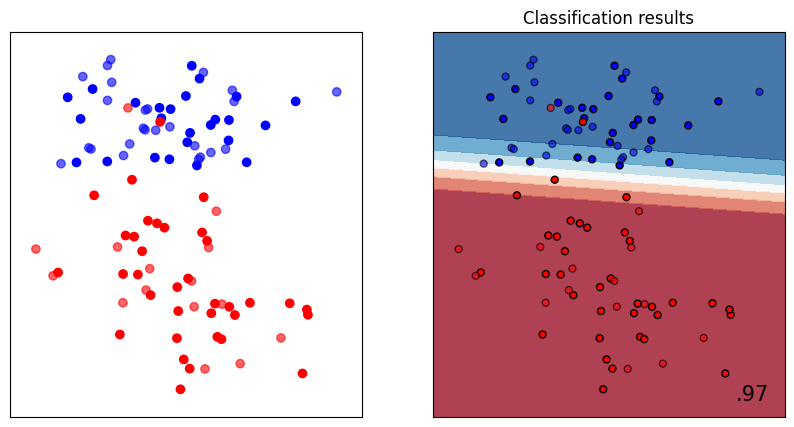

In [84]:
# modified from https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier

# make linearly separable classes, slightly shuffled
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, class_sep = 1.5, 
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

# just use 'identity' in this example
activation_function = 'identity'

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)


# initialise the classifier
clf = MLPClassifier(solver='lbfgs', alpha=0, random_state=1, max_iter=2000,
        early_stopping=True, hidden_layer_sizes=[100, 100],
        activation = activation_function)

# fit the data, examine error
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# below is used for plotting the train/test data and the results

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax[0].set_xlim(xx.min(), xx.max())
ax[0].set_ylim(yy.min(), yy.max())
ax[0].set_xticks(())
ax[0].set_yticks(())

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='black', s=25)
# and testing points
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6, edgecolors='black', s=25)

ax[1].set_xlim(xx.min(), xx.max())
ax[1].set_ylim(yy.min(), yy.max())
ax[1].set_xticks(())
ax[1].set_yticks(())
#ax[1].set_title(name)
ax[1].text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
        size=15, horizontalalignment='right')
    
ax[1].set_title('Classification results'.format(activation_function))
    
plt.show()

### Excercise 1

Let's examine the influence of the activation function when the datset used is not linearly separable. Below sinippet of code runs a multi-layer perceptron with two hidden layers of size (100, 100) on the 'moon' and 'circle' data shown. The learning is done with an identity **activation function**.

Try using different choices of activation functions. Options include:
- `identity`
\begin{equation*}
f_{id}(x) = x
\end{equation*}
- `tanh`
\begin{equation*}
f_{tanh}(x) = \tanh{x}
\end{equation*}
- `logistic` (sigmoid -- used in lecture)
\begin{equation*}
f_{\sigma}(x) = \frac{1}{1+ e^{-x}}
\end{equation*}
- `relu` (rectified linear unit -- deep learning)
\begin{equation*}
f_{relu}(x) = \max(0, x)
\end{equation*}

Look at the results of the classification. Think about the following:
- Are there difference in the quality of the results?
- Are all the activations able to learn the "correct" classification?
- Which activation functions is the best/worst?

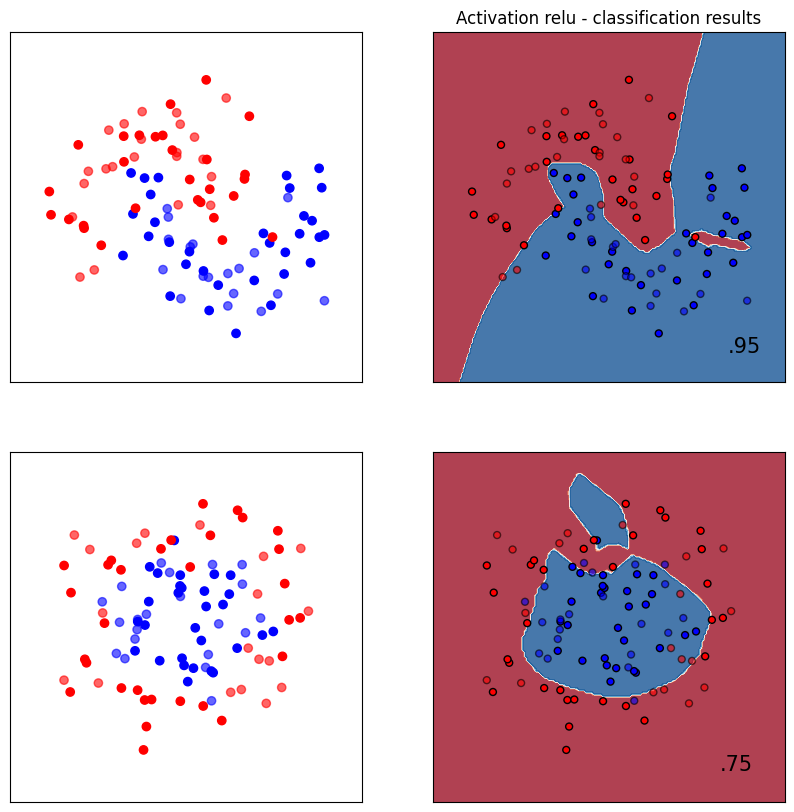

In [85]:
# modified from https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier

datasets = [make_moons(noise=0.3, random_state = 0),
           make_circles(noise=0.2, factor = 0.5, random_state = 1)]


##################################################
# options 'identity', logistic', 'tahn', 'relu'
##################################################
# change below to try different activations
##################################################
activation_function = 'relu'

fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for (X, y), ax in zip(datasets, axs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #ax[0] = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax[0].set_xlim(xx.min(), xx.max())
    ax[0].set_ylim(yy.min(), yy.max())
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    
    
    clf = MLPClassifier(solver='lbfgs', alpha=0, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
            activation = activation_function)
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax[1].contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='black', s=25)
    # and testing points
    ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6, edgecolors='black', s=25)

    ax[1].set_xlim(xx.min(), xx.max())
    ax[1].set_ylim(yy.min(), yy.max())
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    #ax[1].set_title(name)
    ax[1].text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    
axs[0][1].set_title('Activation {} - classification results'.format(activation_function))
    
plt.show()

### Implementation of multi-layer perceptron

Below we are going to work through an implementation of a multi-layer perceptron. We will use it on the digits dataset later in this notebook.

Firstly, we're going to define an abstract concept of a "layer". Layer is just a collection of processing units, which takes some features (input features, or output from a different layer) as input, performs some operation, and outputs new features. Each Layer must implement two operations: a `_forward()` pass, which takes the inputs, applies the operation, and produces the outputs, as well as a `_backward()` pass, that takes the gradients of the next layer, updates the weights based on the input values and the output gradient, and passes the output gradient of the current layer to any previous ones.

This implementation is adapted from [this tutorial](https://github.com/aayushmnit/Deep_learning_explorations/blob/master/1_MLP_from_scratch/Building_neural_network_from_scratch.ipynb).

In [86]:
import numpy as np ## For numerical python
np.random.seed(42)

from abc import ABC, abstractmethod

class Layer(ABC):
    """
    A building block. Each layer is capable of performing two things:
    - Process input to get output:           output = layer._forward(input)
    - Propagate gradients through itself:    input_grad = layer._backward(input, output_grad)
    Some layers also have learnable parameters which they update during layer._backward.
    """
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    @abstractmethod
    def _forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    @abstractmethod
    def _backward(self, input, output_grad):
        """
        Performs a backpropagation step through the layer, with respect to the given input.        
        To compute loss gradients w.r.t input, we need to apply chain rule (backprop):        
        d loss / d x  = (d loss / d layer) * (d layer / d x)
        Luckily, we already receive d loss / d layer as input, so you only need to multiply it by d layer / d x.        
        If our layer has parameters (e.g. dense layer), we also need to update them here using d loss / d layer
        """
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(output_grad, d_layer_d_input) # chain rule


#### Excercise 2: Non-linearity

The simplest layers we will be implementing are our non-linear layers, or **activation functions**. We will be using ReLU, rectified linear unit:
\begin{equation*}
f_{relu}(x) = \max(0, x)
\end{equation*}
With the following derivative:
\begin{equation*}
  f'_{relu}(x)=\begin{cases}
    1, & \text{if $x>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation*}

We will also look at Leaky ReLU, a variant of ReLU which allows a small, non constant gradient $\alpha$ to pass through when the inputs are < 0, according to the following:
\begin{equation*}
f_{leaky_relu}(x) = \max(\alpha x, x)
\end{equation*}
With the following derivative:
With the following derivative:
\begin{equation*}
  f'_{relu}(x)=\begin{cases}
    \alpha, & \text{if $x>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation*}

_Note:_ Don't forget, the derivatives need to be multiplied by the output gradient in the `_backward()` pass.

The below class should implement the ReLU and Leaky ReLU functionality. **Insert the code in the `_forward()` method of both classes to achieve the functionality of the function above, as well as the `_backward()` method of the `LeakyReLU` calss.** The cell below will plot the functionality of the layer you implemented to check for correctness.

The `_backward()` pass function is fully implemented for `ReLU`.

In [87]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def _forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        ############################################
        ########### YOUR IMPLEMENTATION HERE #######
        #### replace the following line: ###########
        ############################################
        return np.maximum(0, input)
    
    def _backward(self, input, output_grad):
        """Compute gradient of loss w.r.t. ReLU input"""
        
        relu_grad = input > 0
        return output_grad*relu_grad 


class LeakyReLU(Layer):
    def __init__(self, alpha = 0.01):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self._alpha = alpha
        pass
    
    def _forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        ############################################
        ########### YOUR IMPLEMENTATION HERE #######
        #### replace the following line: ###########
        ############################################
        return np.where(input > 0, input, self._alpha * input)
    
    def _backward(self, input, output_grad):
        """Compute gradient of loss w.r.t. ReLU input"""
        ############################################
        ########### YOUR IMPLEMENTATION HERE #######
        #### replace the following line: ###########
        ############################################
        lrelu_grad = np.where(input > 0, 1, self._alpha)
        return output_grad*lrelu_grad 


To check if your implementation of ReLU and Leaky ReLU is correct, you can plot the output of this layer for a range of (1-d) inputs:

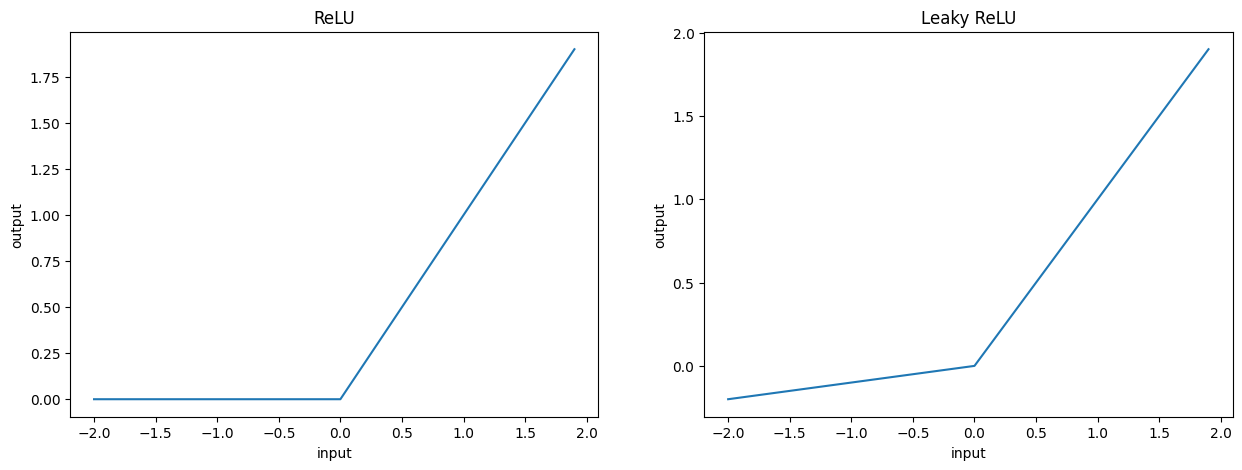

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

X = np.arange(-2, 2, 0.1)
relu = ReLU()
lrelu = LeakyReLU(0.1)

#y = [relu._forward(x) for x in X]
y_relu = relu._forward(X)
y_lrelu = lrelu._forward(X)

ax[0].plot(X, y_relu)
ax[0].set_title('ReLU')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(X, y_lrelu)
ax[1].set_title('Leaky ReLU')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')


plt.show()

#### Exercise 3: Dense layer

For computational efficiency, it is better to model a whole layer of neurons, instead of each neuron separately. This is referred to as the **dense** layer as every neuron in a dense layer takes all the inputs from the previous layer (and it's all outputs are used as inputs to the next layer).

We can model this as:

\begin{equation*}
f(X) = W \cdot X + \vec{b}
\end{equation*}

Here, the matrix $W$ is are the weights for each of the neurons. Each neuron has as many weights as there are `input_units` (and one bias). So there are total `input_units`*`output_units` weights, and `output_units` biases.

Just like before, **insert the code in the `_forward()` method to achieve the functionality of the function above.** The `_backward()` pass function is fully implemented.

Instead of a random initialisation (or zero initialisation) of weights and biases, we are using [Xavier initialisation](https://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization) which helps the model converge faster. Instead of initializing our weights with small numbers which are distributed randomly we initialize our weights with mean zero and variance of 2/(number of inputs + number of outputs).

In [89]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = <W*x> + b
        """
        self.learning_rate = learning_rate
        
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units)
        
    def _forward(self,input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        ############################################
        ########### YOUR IMPLEMENTATION HERE #######
        #### replace the following line: ###########
        ############################################
        #print(input.shape)

        return np.dot(input, self.weights) + self.biases
    
    def _backward(self,input,output_grad):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        input_grad = np.dot(output_grad, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        weights_grad = np.dot(input.T, output_grad)
        biases_grad = output_grad.mean(axis=0)*input.shape[0]
        
        assert weights_grad.shape == self.weights.shape and biases_grad.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * weights_grad
        self.biases = self.biases - self.learning_rate * biases_grad
        
        return input_grad

The below code is a simple test of your implementation of the `_forward()` function. It creates a `Dense()` layer which accepts two inputs (samples with two features), and returns a single output. Then, it creates an array of three samples called `input` and passes it through the network to obtain the `output`. Finally, there is an `assert` command manually testing the output for the second sample.

**Modify the code such that**:
- you create a Dense layer that accepts samples with two features, but returns _two_ outputs instead of one
- the `assert` statement checks the correctness of the _second output_ for the _third sample_

_Reminder:_ The `assert` command will not do anything if the argument passed to it is `True` (in our case, the condition checking for the correctness of the output). Alternatively, it will cause an error if passed a `False` value.

In [93]:
test_layer = Dense(2, 2)
print(test_layer.weights, test_layer.biases)
input = np.array([[1,2],
                  [2,4],
                  [3,6]])
output = test_layer._forward(input)
print(output)
assert(output[2,1] == input[2,0]*test_layer.weights[0,1]+input[2,1]*test_layer.weights[1,1]+test_layer.biases[1])
#output[2,1] == input[2,0]*test_layer.weights[0,1] + input[2,1]*test_layer.weights[1,1] + test_layer.biases[1]


[[ 0.17109316 -1.35289344]
 [-1.2197011  -0.39759732]] [0. 0.]
[[-2.26830903 -2.14808809]
 [-4.53661806 -4.29617617]
 [-6.80492709 -6.44426426]]


#### Loss 

You can see that the above layer expects the output of the gradient during back propagation, but does not compute it itself.

Therefore, we will use a `Loss` class which will be able to return the loss and it's graditent. First we define a template method and then the actual loss we will use.

This is a modification of **cross-entropy** loss. This is a component-wise loss -- the expected output format is a single output class our classifier can predict. 

The network will return unconstrained outputs (which can be greater or lower than zero). The 'softmax' function is a way to map those outputs into class probabilities. However, the crossentropy loss can be more efficiently calculated without first calculating softmax, which is implemented below.

However, we could implement any other `Loss` function to use with this code.

In [94]:
class Loss(ABC):
    def __init__(self):
        self.calculated = False
        pass
    
    @abstractmethod
    def _calculate_loss(self, output, target):
        self.calculated = True
        pass
    
    @abstractmethod
    def _grad(self):
        assert self.calculated == True
        pass

class softmax_crossentropy_with_logits(Loss):
    def __init__(self):
        self.one_hot_target = np.array([])
        self.softmax = np.array([])
        super().__init__()
        
    
    def _calculate_loss(self, output, target):
        super()._calculate_loss(output, target)
        logits_for_target = output[np.arange(len(output)),target]
        xentropy = - logits_for_target + np.log(np.sum(np.exp(output),axis=-1))
        
        self.one_hot_target = np.zeros_like(output)
        self.one_hot_target[np.arange(len(output)), target] = 1
        
        self.softmax = np.exp(output) / np.exp(output).sum(axis = -1, keepdims = True)
        
        return xentropy
    
    def _grad(self):
        super()._grad()
        
        rvalue = (- self.one_hot_target + self.softmax) / self.softmax.shape[0]
        #print(rvalue.shape)
        
        return (- self.one_hot_target + self.softmax) / self.softmax.shape[0]


### MLP Network.

Finally, we define MLP. Despite being a collection of layers, we can think of it as just a big 'layer': we can pass inputs _forward_ through the network and propagate the error _backwards_.

However, will add a `train` method that will do the above, together with calculating the `loss` (pass inputs forward, calculate the error, and propagate it backwards through the networks).

We will also add a predict method. We assume our netork outputs log-probabilities (logits), and the final class prediction is the one with highest (log)-probability.

In [95]:
class Network(Layer):
    def __init__(self, layers, loss = softmax_crossentropy_with_logits()):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.layers = layers
        self.activations = []
        self.loss_ = []
        self.loss = loss
        pass
    
    def _forward(self, input):
        self.activations = []

        # Looping through each layer
        for l in self.layers:
            self.activations.append(l._forward(input))
            # Updating input to last layer output
            input = self.activations[-1]

        assert len(self.activations) == len(self.layers)
        
        return self.activations[-1]
    
    def _backward(self, input, output_grad):
        loss_grad = output_grad
    
        layer_inputs = [input]+self.activations  #layer_input[i] is an input for network[i]
        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.layers))[::-1]:
            layer = self.layers[layer_index]

            loss_grad = layer._backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates    
            
        return loss_grad    
        
    def train(self,X,y):
        """
        Train our network on a given batch of X and y.
        We first need to run forward to get all layer activations.
        Then we can run layer.backward going from last to first layer.
        After we have called backward for all layers, all Dense layers have already made one gradient step.
        """

        # Get the layer activations
        logits = self._forward(X)
        
        # Compute the loss and the initial gradient
        loss = self.loss._calculate_loss(logits, y)
        
        # propagate gradients through the network
        self._backward(X, self.loss._grad())
        
        return self
    
    def predict(self,X):
        """
        Compute network predictions. Returning indices of largest Logit probability
        """
        logits = self._forward(X)
        return logits.argmax(axis=-1)
    

#### Data 

Let's work with some data with more than a handful of dimensions. We will use a toy dataset of handwritten digits accessible thorugh `sklearn`. These are quantised 8x8pixel 4-bit images.

We will load them, display some of them for illustration, "flatten" them from 8x8 and split 50-50 to test and train (not best practice, just for illustration!).

We are loading the data before setting up the network, to know the number of our inputs. Here, it will be 64-dimensional samples (from 8x8 pixels).

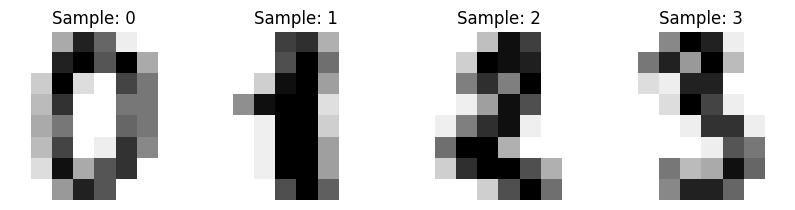

In [96]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Sample: %i" % label)
  
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))/16

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


### Excercise 4

Finally, we get to put together our network and train it.

After running the below code snippet, experiment with different values for **learning rate** and **number of epochs**, different **number of neurons** (in the middle - hidden layer), using different **activation functions** (ReLU v LeakyReLU) as well as different **batch size**.

For **learning rate** and **number of epochs**:
- try LR of 0.01, 0.001, 0.1
- try a mixed LR (e.g. 0.1 on the first two layers and 0.01 on the last layer)
- how does this influence the convergence speed (= **number of epochs** required to train the network)?
- how does this influence _the smootness of the loss graphs_?
    
For different **number of neurons**:
- current configuration is `num_inputs x 100 x 200 x 10`. `num_inputs` and `10` can not change (they depend on the input, and the number of classes -- 10 digits)
- change the number of neurons in the hidden layer: (100, 200) , (100, 100), (200, 200), (200, 100)
- careful to consistently change the dimensions
- remove one of the hidden layers (and the ReLU)

For **activation function**:
- Can you observe any difference in the network behaviour between using ReLU and Leaky ReLU?
- How does the behaviour of the network using Leaky ReLU change for different values of $\alpha$?
    
For **batch_size**:
- try values 16, 32, 64, 128, 898 (dataset size)
- How does this influence the convergence speed?
- how does this influence _the smootness of the loss graphs_?


In [128]:
layers = []
layers.append(Dense(X_train.shape[1],1000, learning_rate = 0.001))
layers.append(ReLU())
layers.append(Dense(1000,300, learning_rate = 0.001))
layers.append(ReLU())
layers.append(Dense(300,10, learning_rate = 0.001))

model = Network(layers)


In [ ]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

train_log = []
val_log = []

for epoch in range(300):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        model.train(x_batch,y_batch)
    
    train_log.append(np.mean(model.predict(X_train)==y_train))
    val_log.append(np.mean(model.predict(X_test)==y_test))
   
#    print("Epoch",epoch)
#    print("Train accuracy:",train_log[-1])
#    print("Val accuracy:",val_log[-1])
plt.plot(train_log,label='train accuracy')
plt.plot(val_log,label='test accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()
    



## Exercise 5

The last thing to examine is the effect of weights and biases initialisation on the speed of convergence of this network. In order to do this, go back to [Exercise 3](#Exercise-3:-Dense-layer), and the implementation of the Dense Layer, and introduce the following options for initialising the weights and biases:
- introduce an additional (string) parameter in the __init__ constructor, called `winit`, to chose the way of initialising weights
- if `winit` is equal to `"normal"`, use the same initialisation which is currently implemented
- if `winit` is equal to `"zeros"`, initialise both weights and biases to 0
- if `winit` is equal to `"ones"`, initialise both weights and biases to 1
- if `winit` is equal to `"zones"`, initialise all the weights to 1 and all the biases to 0

Then, come back to [Excercise 4](#Excercise-4), and repeat the training experiment. Which kind of initialisation works best? Comment on how well other initialisation options work.